In [5]:
import os
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [6]:
os.listdir("/gdrive/My Drive/Colab Notebooks/NER")

['Testing_words',
 'Training_words',
 'train.csv',
 'test.csv',
 'train.gsheet',
 '.ipynb_checkpoints',
 'base_config.cfg',
 'config.cfg',
 'train (1).gsheet',
 'train.spacy',
 'path_to_save_model',
 'Submission1.csv',
 'Submission1.gsheet',
 'data.pkl',
 'submissions2.csv',
 'somefile.txt']

In [7]:
os.chdir('/gdrive/My Drive/Colab Notebooks/NER')

In [8]:
!pip install python-docx

In [10]:
import os
import docx
import glob
import tqdm
import re
document = docx.Document('Training_words/9800047_Rental_Agreement_47.docx')

In [11]:
import spacy

In [12]:
nlp = spacy.load("en_core_web_trf")

In [13]:
#!spacy download en_core_web_trf

In [14]:
data = []
for doc_file in tqdm.tqdm(glob.glob('Training_words/**')):
  print(doc_file)
  doc_data = {'file': doc_file, 'names': []}
  try:
    document = docx.Document(doc_file)
  except:
    continue
  flag = 0
  for para in document.paragraphs:
    doc = nlp(para.text)
    for entity in doc.ents:
      if entity.label_ in ['PERSON', 'ORG']:
        #print(entity.text)
        if re.search('[a-zA-z]/[Oo]', entity.text):
          name = re.split('[a-zA-z]/[Oo]', entity.text)[0].strip()
        else:
          name = entity.text
        begin_index = para.text.index(name)
        end_index = para.text.index(name) + len(name)
        if flag == 1:
          if begin_index - prev_end_index < 10:
            doc_data['names'][-1] = para.text[prev_begin_index:end_index]
        else:
          doc_data['names'].append(name)
        flag = 0
        for token in doc:
          if token.idx > end_index:
            if token.pos_ == "CCONJ":
              flag = 1
              #print(token)
            break
        prev_begin_index = begin_index
        prev_end_index = end_index
  data.append(doc_data)

  0%|          | 0/50 [00:00<?, ?it/s]

Training_words/980007_Rental_Agreement_7.docx


  2%|▏         | 1/50 [00:06<05:19,  6.53s/it]

Training_words/980009_Rental_Agreement_9.docx


  4%|▍         | 2/50 [00:14<05:57,  7.45s/it]

Training_words/9800026_Rental_Agreement_26.docx


  6%|▌         | 3/50 [00:20<05:10,  6.60s/it]

Training_words/9800031_Rental_Agreement_31.docx


  8%|▊         | 4/50 [00:24<04:23,  5.73s/it]

Training_words/9800048_Rental_Agreement_48.docx


 10%|█         | 5/50 [00:40<07:10,  9.56s/it]

Training_words/9800034_Rental_Agreement_34.docx


 12%|█▏        | 6/50 [00:47<06:14,  8.51s/it]

Training_words/9800020_Rental_Agreement_20.docx


 14%|█▍        | 7/50 [00:50<04:47,  6.68s/it]

Training_words/980001_Rental_Agreement_1.doc
Training_words/9800039_Rental_Agreement_39.docx


 18%|█▊        | 9/50 [00:53<02:52,  4.22s/it]

Training_words/9800044_Rental_Agreement_44.docx


 20%|██        | 10/50 [00:58<02:57,  4.45s/it]

Training_words/9800019_Rental_Agreement_19.docx


 22%|██▏       | 11/50 [01:04<03:04,  4.74s/it]

Training_words/980005_Rental_Agreement_5.docx


 24%|██▍       | 12/50 [01:17<04:29,  7.10s/it]

Training_words/9800015_Rental_Agreement_15.docx


 26%|██▌       | 13/50 [01:21<03:51,  6.26s/it]

Training_words/9800022_Rental_Agreement_22.docx


 28%|██▊       | 14/50 [01:27<03:38,  6.08s/it]

Training_words/9800027_Rental_Agreement_27.docx


 30%|███       | 15/50 [01:34<03:47,  6.49s/it]

Training_words/9800050_Rental_Agreement_50.docx


 32%|███▏      | 16/50 [01:44<04:18,  7.60s/it]

Training_words/980004_Rental_Agreement_4.docx


 34%|███▍      | 17/50 [01:58<05:05,  9.25s/it]

Training_words/9800030_Rental_Agreement_30.docx


 36%|███▌      | 18/50 [02:06<04:48,  9.00s/it]

Training_words/9800043_Rental_Agreement_43.docx


 38%|███▊      | 19/50 [02:13<04:20,  8.40s/it]

Training_words/9800018_Rental_Agreement_18.docx


 40%|████      | 20/50 [02:16<03:21,  6.71s/it]

Training_words/9800040_Rental_Agreement_40.docx


 42%|████▏     | 21/50 [02:34<04:54, 10.15s/it]

Training_words/9800042_Rental_Agreement_42.docx


 44%|████▍     | 22/50 [02:38<03:55,  8.40s/it]

Training_words/9800032_Rental_Agreement_32.docx


 46%|████▌     | 23/50 [02:45<03:30,  7.79s/it]

Training_words/9800012_Rental_Agreement_12.docx


 48%|████▊     | 24/50 [02:47<02:40,  6.17s/it]

Training_words/9800023_Rental_Agreement_23.docx


 50%|█████     | 25/50 [02:52<02:28,  5.96s/it]

Training_words/9800014_Rental_Agreement_14.docx


 52%|█████▏    | 26/50 [03:00<02:30,  6.29s/it]

Training_words/9800049_Rental_Agreement_49.docx


 54%|█████▍    | 27/50 [03:05<02:18,  6.03s/it]

Training_words/980008_Rental_Agreement_8.docx


 56%|█████▌    | 28/50 [03:17<02:53,  7.89s/it]

Training_words/9800035_Rental_Agreement_35.docx


 58%|█████▊    | 29/50 [03:23<02:31,  7.20s/it]

Training_words/9800010_Rental_Agreement_10.docx


 60%|██████    | 30/50 [03:26<02:02,  6.12s/it]

Training_words/9800047_Rental_Agreement_47.docx


 62%|██████▏   | 31/50 [03:40<02:40,  8.45s/it]

Training_words/9800011_Rental_Agreement_11.docx


 64%|██████▍   | 32/50 [03:44<02:07,  7.08s/it]

Training_words/9800046_Rental_Agreement_46.docx


 66%|██████▌   | 33/50 [03:52<02:05,  7.35s/it]

Training_words/9800025_Rental_Agreement_25.docx


 68%|██████▊   | 34/50 [04:03<02:13,  8.36s/it]

Training_words/9800028_Rental_Agreement_28.docx


 70%|███████   | 35/50 [04:08<01:49,  7.30s/it]

Training_words/980002_Rental_Agreement_2.docx


 72%|███████▏  | 36/50 [04:26<02:28, 10.63s/it]

Training_words/9800036_Rental_Agreement_36.docx


 74%|███████▍  | 37/50 [04:35<02:10, 10.08s/it]

Training_words/980006_Rental_Agreement_6.docx


 76%|███████▌  | 38/50 [04:42<01:49,  9.10s/it]

Training_words/9800013_Rental_Agreement_13.docx


 78%|███████▊  | 39/50 [05:05<02:26, 13.33s/it]

Training_words/9800021_Rental_Agreement_21.docx


 80%|████████  | 40/50 [05:15<02:04, 12.43s/it]

Training_words/9800037_Rental_Agreement_37.docx


 82%|████████▏ | 41/50 [05:20<01:31, 10.13s/it]

Training_words/980003_Rental_Agreement_3.docx


 84%|████████▍ | 42/50 [05:37<01:38, 12.26s/it]

Training_words/9800033_Rental_Agreement_33.docx


 86%|████████▌ | 43/50 [05:41<01:08,  9.85s/it]

Training_words/9800029_Rental_Agreement_29.docx


 88%|████████▊ | 44/50 [05:51<00:58,  9.67s/it]

Training_words/9800038_Rental_Agreement_38.docx


 90%|█████████ | 45/50 [06:05<00:54, 10.94s/it]

Training_words/9800017_Rental_Agreement_17.docx


 92%|█████████▏| 46/50 [06:09<00:36,  9.01s/it]

Training_words/9800041_Rental_Agreement_41.docx


 94%|█████████▍| 47/50 [06:13<00:22,  7.50s/it]

Training_words/9800024_Rental_Agreement_24.docx


 96%|█████████▌| 48/50 [06:17<00:13,  6.52s/it]

Training_words/9800045_Rental_Agreement_45.docx


 98%|█████████▊| 49/50 [06:30<00:08,  8.26s/it]

Training_words/9800016_Rental_Agreement_16.docx


100%|██████████| 50/50 [06:35<00:00,  7.92s/it]


In [15]:
for doc_file in tqdm.tqdm(glob.glob('Training_words/**')):
  print(doc_file)

100%|██████████| 50/50 [00:00<00:00, 56817.99it/s]

Training_words/980007_Rental_Agreement_7.docx
Training_words/980009_Rental_Agreement_9.docx
Training_words/9800026_Rental_Agreement_26.docx
Training_words/9800031_Rental_Agreement_31.docx
Training_words/9800048_Rental_Agreement_48.docx
Training_words/9800034_Rental_Agreement_34.docx
Training_words/9800020_Rental_Agreement_20.docx
Training_words/980001_Rental_Agreement_1.doc
Training_words/9800039_Rental_Agreement_39.docx
Training_words/9800044_Rental_Agreement_44.docx
Training_words/9800019_Rental_Agreement_19.docx
Training_words/980005_Rental_Agreement_5.docx
Training_words/9800015_Rental_Agreement_15.docx
Training_words/9800022_Rental_Agreement_22.docx
Training_words/9800027_Rental_Agreement_27.docx
Training_words/9800050_Rental_Agreement_50.docx
Training_words/980004_Rental_Agreement_4.docx
Training_words/9800030_Rental_Agreement_30.docx
Training_words/9800043_Rental_Agreement_43.docx
Training_words/9800018_Rental_Agreement_18.docx
Training_words/9800040_Rental_Agreement_40.docx
Tra

In [16]:
import pandas as pd
df_orig = pd.DataFrame(data)
df = pd.DataFrame(data).explode('names').reset_index()
df

,index,file,names
0,0,Training_words/980007_Rental_Agreement_7.docx,Amitabh Reddy
1,0,Training_words/980007_Rental_Agreement_7.docx,Geysers
2,0,Training_words/980007_Rental_Agreement_7.docx,Amitabh Reddy
3,0,Training_words/980007_Rental_Agreement_7.docx,TENANT
4,0,Training_words/980007_Rental_Agreement_7.docx,Srikanth Pai
...,...,...,...
658,48,Training_words/9800016_Rental_Agreement_16.docx,Lingaiah Bathini
659,48,Training_words/9800016_Rental_Agreement_16.docx,Power Research and Development Consultants
660,48,Training_words/9800016_Rental_Agreement_16.docx,Lessee
661,48,Training_words/9800016_Rental_Agreement_16.docx,Lessee


In [17]:
df = df.drop_duplicates().reset_index()
df = pd.merge(df,df_orig,how = 'left',on = 'file')

In [18]:
df

,level_0,index,file,names_x,names_y
0,0,0,Training_words/980007_Rental_Agreement_7.docx,Amitabh Reddy,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT..."
1,1,0,Training_words/980007_Rental_Agreement_7.docx,Geysers,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT..."
2,3,0,Training_words/980007_Rental_Agreement_7.docx,TENANT,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT..."
3,4,0,Training_words/980007_Rental_Agreement_7.docx,Srikanth Pai,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT..."
4,5,1,Training_words/980009_Rental_Agreement_9.docx,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,[Antonio Levy S. Ingles. Jr. and/or Mary Rose ...
...,...,...,...,...,...
297,657,48,Training_words/9800016_Rental_Agreement_16.docx,Veerabrahmam Bathini,"[K. Parthasarathy, Veerabrahmam Bathini, Linga..."
298,658,48,Training_words/9800016_Rental_Agreement_16.docx,Lingaiah Bathini,"[K. Parthasarathy, Veerabrahmam Bathini, Linga..."
299,659,48,Training_words/9800016_Rental_Agreement_16.docx,Power Research and Development Consultants,"[K. Parthasarathy, Veerabrahmam Bathini, Linga..."
300,660,48,Training_words/9800016_Rental_Agreement_16.docx,Lessee,"[K. Parthasarathy, Veerabrahmam Bathini, Linga..."


In [19]:
df['index_entity'] = df.apply(lambda x: x.names_y.index(x.names_x),axis = 1)
df

,level_0,index,file,names_x,names_y,index_entity
0,0,0,Training_words/980007_Rental_Agreement_7.docx,Amitabh Reddy,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",0
1,1,0,Training_words/980007_Rental_Agreement_7.docx,Geysers,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",1
2,3,0,Training_words/980007_Rental_Agreement_7.docx,TENANT,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",3
3,4,0,Training_words/980007_Rental_Agreement_7.docx,Srikanth Pai,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",4
4,5,1,Training_words/980009_Rental_Agreement_9.docx,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,[Antonio Levy S. Ingles. Jr. and/or Mary Rose ...,0
...,...,...,...,...,...,...
297,657,48,Training_words/9800016_Rental_Agreement_16.docx,Veerabrahmam Bathini,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",1
298,658,48,Training_words/9800016_Rental_Agreement_16.docx,Lingaiah Bathini,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",2
299,659,48,Training_words/9800016_Rental_Agreement_16.docx,Power Research and Development Consultants,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",3
300,660,48,Training_words/9800016_Rental_Agreement_16.docx,Lessee,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",4


In [20]:
[1,2,3,4].index(1)

0

In [21]:
pre_text = {}
post_text = {}
for i in range(0,len(df)):
  document = docx.Document(df['file'][i])
  text = '.'.join([p.text for p in document.paragraphs])

  try:
    pre_text[i]= text.split(df['names_x'][i])[0]
    post_text[i] = text.split(df['names_x'][i])[1]
  except:
    print(df['names_x'][i])
    pre_text[i] = " "
    post_text[i] = " "

In [22]:
agreement_pre = {}
between_pre = {}
landlord_post = {}
owner_post = {}

In [23]:
for i in range(0,len(df)):
  agreement_pre[i] = 'agreement' in pre_text[i].lower()
  if 'between' in pre_text[i].lower():
    between_pre[i] = len(pre_text[i]) - re.search('between',pre_text[i].lower()).span()[1]
  else:
    between_pre[i] = 0
  if 'landlord' in post_text[i].lower():
    landlord_post[i] = re.search('landlord',post_text[i].lower()).span()[0]
  else:
    landlord_post[i] = 0
  if 'owner' in post_text[i].lower():
    owner_post[i] = re.search('owner',post_text[i].lower()).span()[0]
  else:
    owner_post[i] = 0

In [24]:
df['index'] = df.index

In [25]:
df

,level_0,index,file,names_x,names_y,index_entity
0,0,0,Training_words/980007_Rental_Agreement_7.docx,Amitabh Reddy,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",0
1,1,1,Training_words/980007_Rental_Agreement_7.docx,Geysers,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",1
2,3,2,Training_words/980007_Rental_Agreement_7.docx,TENANT,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",3
3,4,3,Training_words/980007_Rental_Agreement_7.docx,Srikanth Pai,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",4
4,5,4,Training_words/980009_Rental_Agreement_9.docx,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,[Antonio Levy S. Ingles. Jr. and/or Mary Rose ...,0
...,...,...,...,...,...,...
297,657,297,Training_words/9800016_Rental_Agreement_16.docx,Veerabrahmam Bathini,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",1
298,658,298,Training_words/9800016_Rental_Agreement_16.docx,Lingaiah Bathini,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",2
299,659,299,Training_words/9800016_Rental_Agreement_16.docx,Power Research and Development Consultants,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",3
300,660,300,Training_words/9800016_Rental_Agreement_16.docx,Lessee,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",4


In [26]:
df['agreement'] = df['index'].apply(lambda x: agreement_pre[x])
df['between'] = df['index'].apply(lambda x: between_pre[x])
df['landlord'] = df['index'].apply(lambda x: landlord_post[x])
df['owner'] = df['index'].apply(lambda x: owner_post[x])

In [27]:
df

,level_0,index,file,names_x,names_y,index_entity,agreement,between,landlord,owner
0,0,0,Training_words/980007_Rental_Agreement_7.docx,Amitabh Reddy,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",0,True,6,0,135
1,1,1,Training_words/980007_Rental_Agreement_7.docx,Geysers,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",1,True,3091,0,151
2,3,2,Training_words/980007_Rental_Agreement_7.docx,TENANT,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",3,True,271,0,56
3,4,3,Training_words/980007_Rental_Agreement_7.docx,Srikanth Pai,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",4,True,3290,0,0
4,5,4,Training_words/980009_Rental_Agreement_9.docx,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,[Antonio Levy S. Ingles. Jr. and/or Mary Rose ...,0,False,2,0,142
...,...,...,...,...,...,...,...,...,...,...
297,657,297,Training_words/9800016_Rental_Agreement_16.docx,Veerabrahmam Bathini,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",1,True,338,0,333
298,658,298,Training_words/9800016_Rental_Agreement_16.docx,Lingaiah Bathini,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",2,True,367,0,308
299,659,299,Training_words/9800016_Rental_Agreement_16.docx,Power Research and Development Consultants,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",3,True,433,0,216
300,660,300,Training_words/9800016_Rental_Agreement_16.docx,Lessee,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",4,True,656,0,29


In [28]:
df['file'] = df['file'].apply(lambda x: x.split('/')[1])
df

,level_0,index,file,names_x,names_y,index_entity,agreement,between,landlord,owner
0,0,0,980007_Rental_Agreement_7.docx,Amitabh Reddy,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",0,True,6,0,135
1,1,1,980007_Rental_Agreement_7.docx,Geysers,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",1,True,3091,0,151
2,3,2,980007_Rental_Agreement_7.docx,TENANT,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",3,True,271,0,56
3,4,3,980007_Rental_Agreement_7.docx,Srikanth Pai,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",4,True,3290,0,0
4,5,4,980009_Rental_Agreement_9.docx,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,[Antonio Levy S. Ingles. Jr. and/or Mary Rose ...,0,False,2,0,142
...,...,...,...,...,...,...,...,...,...,...
297,657,297,9800016_Rental_Agreement_16.docx,Veerabrahmam Bathini,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",1,True,338,0,333
298,658,298,9800016_Rental_Agreement_16.docx,Lingaiah Bathini,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",2,True,367,0,308
299,659,299,9800016_Rental_Agreement_16.docx,Power Research and Development Consultants,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",3,True,433,0,216
300,660,300,9800016_Rental_Agreement_16.docx,Lessee,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",4,True,656,0,29


In [29]:
os.listdir()

['Testing_words',
 'Training_words',
 'train.csv',
 'test.csv',
 'train.gsheet',
 '.ipynb_checkpoints',
 'base_config.cfg',
 'config.cfg',
 'train (1).gsheet',
 'train.spacy',
 'path_to_save_model',
 'Submission1.csv',
 'Submission1.gsheet',
 'data.pkl',
 'submissions2.csv',
 'somefile.txt',
 'out_test.json']

In [30]:
labels = pd.read_csv('train.csv')
labels

,File Name,PartyOne
0,980001_Rental_Agreement_1,Mr. RK Senthil Kumar
1,980002_Rental_Agreement_2,MR AMAR ARUN WAGH
2,980003_Rental_Agreement_3,Mrs. Meera Garge
3,980004_Rental_Agreement_4,Mrs. Usha Tiwari
4,980005_Rental_Agreement_5,Mr.Dhannatej Vaddadi
5,980006_Rental_Agreement_6,Raghuram Sagar
6,980007_Rental_Agreement_7,Amitabh Reddy
7,980008_Rental_Agreement_8,Gauravkumar Kate
8,980009_Rental_Agreement_9,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...
9,9800010_Rental_Agreement_10,MR.K.Kuttan


In [31]:
df

,level_0,index,file,names_x,names_y,index_entity,agreement,between,landlord,owner
0,0,0,980007_Rental_Agreement_7.docx,Amitabh Reddy,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",0,True,6,0,135
1,1,1,980007_Rental_Agreement_7.docx,Geysers,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",1,True,3091,0,151
2,3,2,980007_Rental_Agreement_7.docx,TENANT,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",3,True,271,0,56
3,4,3,980007_Rental_Agreement_7.docx,Srikanth Pai,"[Amitabh Reddy, Geysers, Amitabh Reddy, TENANT...",4,True,3290,0,0
4,5,4,980009_Rental_Agreement_9.docx,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,[Antonio Levy S. Ingles. Jr. and/or Mary Rose ...,0,False,2,0,142
...,...,...,...,...,...,...,...,...,...,...
297,657,297,9800016_Rental_Agreement_16.docx,Veerabrahmam Bathini,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",1,True,338,0,333
298,658,298,9800016_Rental_Agreement_16.docx,Lingaiah Bathini,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",2,True,367,0,308
299,659,299,9800016_Rental_Agreement_16.docx,Power Research and Development Consultants,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",3,True,433,0,216
300,660,300,9800016_Rental_Agreement_16.docx,Lessee,"[K. Parthasarathy, Veerabrahmam Bathini, Linga...",4,True,656,0,29


In [32]:
df = df[['file','names_x','index_entity',	'agreement',	'between',	'landlord','owner']]
df.columns = ['File Name','name','index_entity',	'agreement',	'between',	'landlord','owner']

In [33]:
df['File Name'] = df['File Name'].apply(lambda x: x.split('.')[0])
df

<ipython-input-33-d07cadaa0c76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['File Name'] = df['File Name'].apply(lambda x: x.split('.')[0])


,File Name,name,index_entity,agreement,between,landlord,owner
0,980007_Rental_Agreement_7,Amitabh Reddy,0,True,6,0,135
1,980007_Rental_Agreement_7,Geysers,1,True,3091,0,151
2,980007_Rental_Agreement_7,TENANT,3,True,271,0,56
3,980007_Rental_Agreement_7,Srikanth Pai,4,True,3290,0,0
4,980009_Rental_Agreement_9,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,0,False,2,0,142
...,...,...,...,...,...,...,...
297,9800016_Rental_Agreement_16,Veerabrahmam Bathini,1,True,338,0,333
298,9800016_Rental_Agreement_16,Lingaiah Bathini,2,True,367,0,308
299,9800016_Rental_Agreement_16,Power Research and Development Consultants,3,True,433,0,216
300,9800016_Rental_Agreement_16,Lessee,4,True,656,0,29


In [34]:
Train = pd.merge(df,labels,how = 'left',on = 'File Name')
Train

,File Name,name,index_entity,agreement,between,landlord,owner,PartyOne
0,980007_Rental_Agreement_7,Amitabh Reddy,0,True,6,0,135,Amitabh Reddy
1,980007_Rental_Agreement_7,Geysers,1,True,3091,0,151,Amitabh Reddy
2,980007_Rental_Agreement_7,TENANT,3,True,271,0,56,Amitabh Reddy
3,980007_Rental_Agreement_7,Srikanth Pai,4,True,3290,0,0,Amitabh Reddy
4,980009_Rental_Agreement_9,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,0,False,2,0,142,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...
...,...,...,...,...,...,...,...,...
297,9800016_Rental_Agreement_16,Veerabrahmam Bathini,1,True,338,0,333,K. Parthasarathy
298,9800016_Rental_Agreement_16,Lingaiah Bathini,2,True,367,0,308,K. Parthasarathy
299,9800016_Rental_Agreement_16,Power Research and Development Consultants,3,True,433,0,216,K. Parthasarathy
300,9800016_Rental_Agreement_16,Lessee,4,True,656,0,29,K. Parthasarathy


In [35]:
Train['name_simple'] = Train['name'].apply(lambda x: re.sub("[^a-zA-Z]+", "", x))
Train['label_simple'] = Train['PartyOne'].apply(lambda x: re.sub("[^a-zA-Z]+", "", x))
Train

,File Name,name,index_entity,agreement,between,landlord,owner,PartyOne,name_simple,label_simple
0,980007_Rental_Agreement_7,Amitabh Reddy,0,True,6,0,135,Amitabh Reddy,AmitabhReddy,AmitabhReddy
1,980007_Rental_Agreement_7,Geysers,1,True,3091,0,151,Amitabh Reddy,Geysers,AmitabhReddy
2,980007_Rental_Agreement_7,TENANT,3,True,271,0,56,Amitabh Reddy,TENANT,AmitabhReddy
3,980007_Rental_Agreement_7,Srikanth Pai,4,True,3290,0,0,Amitabh Reddy,SrikanthPai,AmitabhReddy
4,980009_Rental_Agreement_9,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,0,False,2,0,142,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,AntonioLevySInglesJrandorMaryRoseCIngles,AntonioLevySInglesJrandorMaryRoseCIngles
...,...,...,...,...,...,...,...,...,...,...
297,9800016_Rental_Agreement_16,Veerabrahmam Bathini,1,True,338,0,333,K. Parthasarathy,VeerabrahmamBathini,KParthasarathy
298,9800016_Rental_Agreement_16,Lingaiah Bathini,2,True,367,0,308,K. Parthasarathy,LingaiahBathini,KParthasarathy
299,9800016_Rental_Agreement_16,Power Research and Development Consultants,3,True,433,0,216,K. Parthasarathy,PowerResearchandDevelopmentConsultants,KParthasarathy
300,9800016_Rental_Agreement_16,Lessee,4,True,656,0,29,K. Parthasarathy,Lessee,KParthasarathy


In [36]:
Train['target'] = Train['name_simple'] == Train['label_simple']

In [37]:
Train

,File Name,name,index_entity,agreement,between,landlord,owner,PartyOne,name_simple,label_simple,target
0,980007_Rental_Agreement_7,Amitabh Reddy,0,True,6,0,135,Amitabh Reddy,AmitabhReddy,AmitabhReddy,True
1,980007_Rental_Agreement_7,Geysers,1,True,3091,0,151,Amitabh Reddy,Geysers,AmitabhReddy,False
2,980007_Rental_Agreement_7,TENANT,3,True,271,0,56,Amitabh Reddy,TENANT,AmitabhReddy,False
3,980007_Rental_Agreement_7,Srikanth Pai,4,True,3290,0,0,Amitabh Reddy,SrikanthPai,AmitabhReddy,False
4,980009_Rental_Agreement_9,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,0,False,2,0,142,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,AntonioLevySInglesJrandorMaryRoseCIngles,AntonioLevySInglesJrandorMaryRoseCIngles,True
...,...,...,...,...,...,...,...,...,...,...,...
297,9800016_Rental_Agreement_16,Veerabrahmam Bathini,1,True,338,0,333,K. Parthasarathy,VeerabrahmamBathini,KParthasarathy,False
298,9800016_Rental_Agreement_16,Lingaiah Bathini,2,True,367,0,308,K. Parthasarathy,LingaiahBathini,KParthasarathy,False
299,9800016_Rental_Agreement_16,Power Research and Development Consultants,3,True,433,0,216,K. Parthasarathy,PowerResearchandDevelopmentConsultants,KParthasarathy,False
300,9800016_Rental_Agreement_16,Lessee,4,True,656,0,29,K. Parthasarathy,Lessee,KParthasarathy,False


In [38]:
Train['target'].value_counts()

False    268
True      34
Name: target, dtype: int64

In [39]:
Train.isnull().sum()

File Name       0
name            0
index_entity    0
agreement       0
between         0
landlord        0
owner           0
PartyOne        0
name_simple     0
label_simple    0
target          0
dtype: int64

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=10)

In [41]:
Train.columns

Index(['File Name', 'name', 'index_entity', 'agreement', 'between', 'landlord',
       'owner', 'PartyOne', 'name_simple', 'label_simple', 'target'],
      dtype='object')

In [42]:
X = Train[['index_entity', 'agreement', 'between', 'landlord','owner']]
y = Train['target']

In [43]:
clf.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [44]:
sum(clf.predict(X) == y)

292

In [45]:
len(y)

302

In [220]:
Train

,File Name,name,index_entity,agreement,between,landlord,owner,PartyOne,name_simple,label_simple,target
0,980007_Rental_Agreement_7,Amitabh Reddy,0,True,6,0,135,Amitabh Reddy,AmitabhReddy,AmitabhReddy,True
1,980007_Rental_Agreement_7,Geysers,1,True,3091,0,151,Amitabh Reddy,Geysers,AmitabhReddy,False
2,980007_Rental_Agreement_7,TENANT,3,True,271,0,56,Amitabh Reddy,TENANT,AmitabhReddy,False
3,980007_Rental_Agreement_7,Srikanth Pai,4,True,3290,0,0,Amitabh Reddy,SrikanthPai,AmitabhReddy,False
4,980009_Rental_Agreement_9,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,0,False,2,0,142,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,AntonioLevySInglesJrandorMaryRoseCIngles,AntonioLevySInglesJrandorMaryRoseCIngles,True
...,...,...,...,...,...,...,...,...,...,...,...
297,9800016_Rental_Agreement_16,Veerabrahmam Bathini,1,True,338,0,333,K. Parthasarathy,VeerabrahmamBathini,KParthasarathy,False
298,9800016_Rental_Agreement_16,Lingaiah Bathini,2,True,367,0,308,K. Parthasarathy,LingaiahBathini,KParthasarathy,False
299,9800016_Rental_Agreement_16,Power Research and Development Consultants,3,True,433,0,216,K. Parthasarathy,PowerResearchandDevelopmentConsultants,KParthasarathy,False
300,9800016_Rental_Agreement_16,Lessee,4,True,656,0,29,K. Parthasarathy,Lessee,KParthasarathy,False


In [224]:
y_train_pred = [i[0] for i in clf.predict_proba(X)]
y_train_pred

[0.16535269078747342,
 0.9678760971626863,
 0.9971014492753623,
 0.9955629877369008,
 0.2292920847268673,
 0.9871014492753624,
 0.9855629877369008,
 0.9955629877369008,
 0.16535269078747342,
 0.945774647887324,
 0.9928760971626863,
 0.9971014492753623,
 0.9955629877369008,
 1.0,
 0.945774647887324,
 0.9928760971626863,
 0.24759906759906758,
 0.895774647887324,
 0.995774647887324,
 1.0,
 0.9955629877369008,
 1.0,
 0.996875,
 1.0,
 0.996875,
 1.0,
 1.0,
 1.0,
 1.0,
 0.995774647887324,
 0.9971014492753623,
 0.9928760971626863,
 0.9955629877369008,
 0.975,
 0.9924379877369007,
 0.9953365384615385,
 1.0,
 0.8816666666666666,
 0.8607746478873238,
 0.945774647887324,
 0.45370600414078677,
 0.26535269078747337,
 0.9971014492753623,
 0.9928760971626863,
 0.9971014492753623,
 0.40608695652173915,
 0.9387681159420289,
 0.9004347826086956,
 0.6768236714975846,
 0.8004347826086956,
 0.47275362318840586,
 0.9971014492753623,
 0.8671014492753624,
 0.9971014492753623,
 0.9971014492753623,
 0.995336538

In [225]:
Train['probs'] = y_train_pred
Train

,File Name,name,index_entity,agreement,between,landlord,owner,PartyOne,name_simple,label_simple,target,probs
0,980007_Rental_Agreement_7,Amitabh Reddy,0,True,6,0,135,Amitabh Reddy,AmitabhReddy,AmitabhReddy,True,0.165353
1,980007_Rental_Agreement_7,Geysers,1,True,3091,0,151,Amitabh Reddy,Geysers,AmitabhReddy,False,0.967876
2,980007_Rental_Agreement_7,TENANT,3,True,271,0,56,Amitabh Reddy,TENANT,AmitabhReddy,False,0.997101
3,980007_Rental_Agreement_7,Srikanth Pai,4,True,3290,0,0,Amitabh Reddy,SrikanthPai,AmitabhReddy,False,0.995563
4,980009_Rental_Agreement_9,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,0,False,2,0,142,Antonio Levy S. Ingles. Jr. and/or Mary Rose C...,AntonioLevySInglesJrandorMaryRoseCIngles,AntonioLevySInglesJrandorMaryRoseCIngles,True,0.229292
...,...,...,...,...,...,...,...,...,...,...,...,...
297,9800016_Rental_Agreement_16,Veerabrahmam Bathini,1,True,338,0,333,K. Parthasarathy,VeerabrahmamBathini,KParthasarathy,False,0.992876
298,9800016_Rental_Agreement_16,Lingaiah Bathini,2,True,367,0,308,K. Parthasarathy,LingaiahBathini,KParthasarathy,False,0.992876
299,9800016_Rental_Agreement_16,Power Research and Development Consultants,3,True,433,0,216,K. Parthasarathy,PowerResearchandDevelopmentConsultants,KParthasarathy,False,0.997101
300,9800016_Rental_Agreement_16,Lessee,4,True,656,0,29,K. Parthasarathy,Lessee,KParthasarathy,False,0.997101


In [232]:
clf

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [233]:
from sklearn.tree import export_graphviz

In [234]:
export_graphviz(clf[0],
                feature_names=X.columns,
                filled=True,
                rounded=True)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="between <= 15.5\\ngini = 0.235\\nsamples = 188\\nvalue = [261, 41]", fillcolor="#e99558"] ;\n1 [label="index_entity <= 1.5\\ngini = 0.485\\nsamples = 52\\nvalue = [51, 36]", fillcolor="#f7dac5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="index_entity <= 0.5\\ngini = 0.403\\nsamples = 31\\nvalue = [14, 36]", fillcolor="#86c3ef"] ;\n1 -> 2 ;\n3 [label="owner <= 823.5\\ngini = 0.386\\nsamples = 28\\nvalue = [12, 34]", fillcolor="#7fc0ee"] ;\n2 -> 3 ;\n4 [label="agreement <= 0.5\\ngini = 0.283\\nsamples = 25\\nvalue = [7, 34]", fillcolor="#62b1ea"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]", fillcolor="#399de5"] ;\n4 -> 5 ;\n6 [label="gini = 0.289\\nsamples = 24\\nvalue = [7, 33]", fillcolor="#63b2eb"] ;\n4 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 3\\nvalue = [5, 0]", fillcolor="#e58139"] ;\n3 -> 

In [235]:
os.system('dot -Tpng tree.dot -o tree.png')


512

[Text(0.5555555555555556, 0.9166666666666666, 'between <= 15.5\ngini = 0.235\nsamples = 188\nvalue = [261, 41]\nclass = TRUE'),
 Text(0.3333333333333333, 0.75, 'index_entity <= 1.5\ngini = 0.485\nsamples = 52\nvalue = [51, 36]\nclass = TRUE'),
 Text(0.2777777777777778, 0.5833333333333334, 'index_entity <= 0.5\ngini = 0.403\nsamples = 31\nvalue = [14, 36]\nclass = FALSE'),
 Text(0.16666666666666666, 0.4166666666666667, 'owner <= 823.5\ngini = 0.386\nsamples = 28\nvalue = [12, 34]\nclass = FALSE'),
 Text(0.1111111111111111, 0.25, 'agreement <= 0.5\ngini = 0.283\nsamples = 25\nvalue = [7, 34]\nclass = FALSE'),
 Text(0.05555555555555555, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = FALSE'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.289\nsamples = 24\nvalue = [7, 33]\nclass = FALSE'),
 Text(0.2222222222222222, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]\nclass = TRUE'),
 Text(0.3888888888888889, 0.4166666666666667, 'landlord <= 2.5\ngini = 0.5\ns

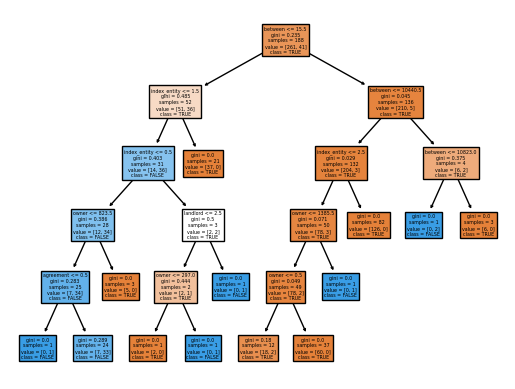

In [238]:
from sklearn import tree
tree.plot_tree(clf.estimators_[0],
               feature_names = X.columns,
               class_names=['TRUE','FALSE'],
               filled = True)

In [46]:
os.listdir()

['Testing_words',
 'Training_words',
 'train.csv',
 'test.csv',
 'train.gsheet',
 '.ipynb_checkpoints',
 'base_config.cfg',
 'config.cfg',
 'train (1).gsheet',
 'train.spacy',
 'path_to_save_model',
 'Submission1.csv',
 'Submission1.gsheet',
 'data.pkl',
 'submissions2.csv',
 'somefile.txt',
 'out_test.json']

In [173]:
import json
with open('out_test.json', 'r') as f:
  test_json = json.load(f)

In [174]:
os.listdir()

['Testing_words',
 'Training_words',
 'train.csv',
 'test.csv',
 'train.gsheet',
 '.ipynb_checkpoints',
 'base_config.cfg',
 'config.cfg',
 'train (1).gsheet',
 'train.spacy',
 'path_to_save_model',
 'Submission1.csv',
 'Submission1.gsheet',
 'data.pkl',
 'submissions2.csv',
 'somefile.txt',
 'out_test.json',
 'Submission_3.csv']

In [175]:
lists = [(x['File Name'], [e[1] for e in x['entities']]) for x in test_json]


In [176]:
Tests = pd.DataFrame(columns = ['File Name','names'])
Tests

,File Name,names


In [177]:
files = [i[0] for i in lists]
names = [i[1] for i in lists]

In [178]:
Tests['File Name'] = files
Tests['names'] = names

In [179]:
Tests

,File Name,names
0,EVAL_Rental_Agreement_1.docx,"[Hanumaiah, Vishal Bhardwaj]"
1,EVAL_Rental_Agreement_2.docx,"[S Parthasarathy, Hari Kiran Tholeti, S Partha..."
2,EVAL_Rental_Agreement_3.docx,[S.Sakunthala]
3,EVAL_Rental_Agreement_6.docx,[KAPIL MEHROTRA]
4,EVAL_Rental_Agreement_5.docx,"[C.BHAGYAMMA, HEREINAFTER]"
5,EVAL_Rental_Agreement_8.docx,"[.Giddappa, Pottumurthi Udayalaxmi]"
6,EVAL_Rental_Agreement_4.docx,"[V.K.NATARAJ, V.KANDASWAMI CHETTIAR, RAJESH CH..."
7,EVAL_Rental_Agreement_7.docx,"[SIMON PA, VAIRAVAN A]"


In [180]:
[i[0] for i in lists]

['EVAL_Rental_Agreement_1.docx',
 'EVAL_Rental_Agreement_2.docx',
 'EVAL_Rental_Agreement_3.docx',
 'EVAL_Rental_Agreement_6.docx',
 'EVAL_Rental_Agreement_5.docx',
 'EVAL_Rental_Agreement_8.docx',
 'EVAL_Rental_Agreement_4.docx',
 'EVAL_Rental_Agreement_7.docx']

In [181]:
for doc_file in tqdm.tqdm(glob.glob('Test_words/**')):
  print(doc_file)

0it [00:00, ?it/s]


In [182]:
import pandas as pd
Test_orig = Tests
Test = Tests.explode('names').reset_index()
Test

,index,File Name,names
0,0,EVAL_Rental_Agreement_1.docx,Hanumaiah
1,0,EVAL_Rental_Agreement_1.docx,Vishal Bhardwaj
2,1,EVAL_Rental_Agreement_2.docx,S Parthasarathy
3,1,EVAL_Rental_Agreement_2.docx,Hari Kiran Tholeti
4,1,EVAL_Rental_Agreement_2.docx,S Parthasarathy
5,1,EVAL_Rental_Agreement_2.docx,S Parthasarathy
6,1,EVAL_Rental_Agreement_2.docx,Hari Kiran Tholeti
7,2,EVAL_Rental_Agreement_3.docx,S.Sakunthala
8,3,EVAL_Rental_Agreement_6.docx,KAPIL MEHROTRA
9,4,EVAL_Rental_Agreement_5.docx,C.BHAGYAMMA


In [183]:
Test_orig

,File Name,names
0,EVAL_Rental_Agreement_1.docx,"[Hanumaiah, Vishal Bhardwaj]"
1,EVAL_Rental_Agreement_2.docx,"[S Parthasarathy, Hari Kiran Tholeti, S Partha..."
2,EVAL_Rental_Agreement_3.docx,[S.Sakunthala]
3,EVAL_Rental_Agreement_6.docx,[KAPIL MEHROTRA]
4,EVAL_Rental_Agreement_5.docx,"[C.BHAGYAMMA, HEREINAFTER]"
5,EVAL_Rental_Agreement_8.docx,"[.Giddappa, Pottumurthi Udayalaxmi]"
6,EVAL_Rental_Agreement_4.docx,"[V.K.NATARAJ, V.KANDASWAMI CHETTIAR, RAJESH CH..."
7,EVAL_Rental_Agreement_7.docx,"[SIMON PA, VAIRAVAN A]"


In [184]:
Test = Test.drop_duplicates()
Test = pd.merge(Test,Test_orig,how = 'left',on = 'File Name')
Test

,index,File Name,names_x,names_y
0,0,EVAL_Rental_Agreement_1.docx,Hanumaiah,"[Hanumaiah, Vishal Bhardwaj]"
1,0,EVAL_Rental_Agreement_1.docx,Vishal Bhardwaj,"[Hanumaiah, Vishal Bhardwaj]"
2,1,EVAL_Rental_Agreement_2.docx,S Parthasarathy,"[S Parthasarathy, Hari Kiran Tholeti, S Partha..."
3,1,EVAL_Rental_Agreement_2.docx,Hari Kiran Tholeti,"[S Parthasarathy, Hari Kiran Tholeti, S Partha..."
4,2,EVAL_Rental_Agreement_3.docx,S.Sakunthala,[S.Sakunthala]
5,3,EVAL_Rental_Agreement_6.docx,KAPIL MEHROTRA,[KAPIL MEHROTRA]
6,4,EVAL_Rental_Agreement_5.docx,C.BHAGYAMMA,"[C.BHAGYAMMA, HEREINAFTER]"
7,4,EVAL_Rental_Agreement_5.docx,HEREINAFTER,"[C.BHAGYAMMA, HEREINAFTER]"
8,5,EVAL_Rental_Agreement_8.docx,.Giddappa,"[.Giddappa, Pottumurthi Udayalaxmi]"
9,5,EVAL_Rental_Agreement_8.docx,Pottumurthi Udayalaxmi,"[.Giddappa, Pottumurthi Udayalaxmi]"


In [185]:
Test

,index,File Name,names_x,names_y
0,0,EVAL_Rental_Agreement_1.docx,Hanumaiah,"[Hanumaiah, Vishal Bhardwaj]"
1,0,EVAL_Rental_Agreement_1.docx,Vishal Bhardwaj,"[Hanumaiah, Vishal Bhardwaj]"
2,1,EVAL_Rental_Agreement_2.docx,S Parthasarathy,"[S Parthasarathy, Hari Kiran Tholeti, S Partha..."
3,1,EVAL_Rental_Agreement_2.docx,Hari Kiran Tholeti,"[S Parthasarathy, Hari Kiran Tholeti, S Partha..."
4,2,EVAL_Rental_Agreement_3.docx,S.Sakunthala,[S.Sakunthala]
5,3,EVAL_Rental_Agreement_6.docx,KAPIL MEHROTRA,[KAPIL MEHROTRA]
6,4,EVAL_Rental_Agreement_5.docx,C.BHAGYAMMA,"[C.BHAGYAMMA, HEREINAFTER]"
7,4,EVAL_Rental_Agreement_5.docx,HEREINAFTER,"[C.BHAGYAMMA, HEREINAFTER]"
8,5,EVAL_Rental_Agreement_8.docx,.Giddappa,"[.Giddappa, Pottumurthi Udayalaxmi]"
9,5,EVAL_Rental_Agreement_8.docx,Pottumurthi Udayalaxmi,"[.Giddappa, Pottumurthi Udayalaxmi]"


In [186]:
Test['index_entity'] = Test.apply(lambda x: x.names_y.index(x.names_x),axis = 1)
Test

,index,File Name,names_x,names_y,index_entity
0,0,EVAL_Rental_Agreement_1.docx,Hanumaiah,"[Hanumaiah, Vishal Bhardwaj]",0
1,0,EVAL_Rental_Agreement_1.docx,Vishal Bhardwaj,"[Hanumaiah, Vishal Bhardwaj]",1
2,1,EVAL_Rental_Agreement_2.docx,S Parthasarathy,"[S Parthasarathy, Hari Kiran Tholeti, S Partha...",0
3,1,EVAL_Rental_Agreement_2.docx,Hari Kiran Tholeti,"[S Parthasarathy, Hari Kiran Tholeti, S Partha...",1
4,2,EVAL_Rental_Agreement_3.docx,S.Sakunthala,[S.Sakunthala],0
5,3,EVAL_Rental_Agreement_6.docx,KAPIL MEHROTRA,[KAPIL MEHROTRA],0
6,4,EVAL_Rental_Agreement_5.docx,C.BHAGYAMMA,"[C.BHAGYAMMA, HEREINAFTER]",0
7,4,EVAL_Rental_Agreement_5.docx,HEREINAFTER,"[C.BHAGYAMMA, HEREINAFTER]",1
8,5,EVAL_Rental_Agreement_8.docx,.Giddappa,"[.Giddappa, Pottumurthi Udayalaxmi]",0
9,5,EVAL_Rental_Agreement_8.docx,Pottumurthi Udayalaxmi,"[.Giddappa, Pottumurthi Udayalaxmi]",1


In [187]:
pre_text = {}
post_text = {}
for i in range(0,len(Test)):
  document = docx.Document(os.path.join('Testing_words', Test['File Name'][i]))
  text = '.'.join([p.text for p in document.paragraphs])

  try:
    pre_text[i]= text.split(Test['names_x'][i])[0]
    post_text[i] = text.split(Test['names_x'][i])[1]
  except:
    print(Test['names_x'][i])
    pre_text[i] = " "
    post_text[i] = " "

SIMON PA
VAIRAVAN A


In [188]:
agreement_pre = {}
between_pre = {}
landlord_post = {}
owner_post = {}
titles = {}

In [189]:
Titles = ['MR.','Mrs.','Sri']

In [190]:
for i in range(0,len(Test)):
  agreement_pre[i] = 'agreement' in pre_text[i].lower()
  if 'between' in pre_text[i].lower():
    between_pre[i] = len(pre_text[i]) - re.search('between',pre_text[i].lower()).span()[1]
  else:
    between_pre[i] = 0
  if 'landlord' in post_text[i].lower():
    landlord_post[i] = re.search('landlord',post_text[i].lower()).span()[0]
  else:
    landlord_post[i] = 0
  if 'owner' in post_text[i].lower():
    owner_post[i] = re.search('owner',post_text[i].lower()).span()[0]
  else:
    owner_post[i] = 0





In [191]:
Test

,index,File Name,names_x,names_y,index_entity
0,0,EVAL_Rental_Agreement_1.docx,Hanumaiah,"[Hanumaiah, Vishal Bhardwaj]",0
1,0,EVAL_Rental_Agreement_1.docx,Vishal Bhardwaj,"[Hanumaiah, Vishal Bhardwaj]",1
2,1,EVAL_Rental_Agreement_2.docx,S Parthasarathy,"[S Parthasarathy, Hari Kiran Tholeti, S Partha...",0
3,1,EVAL_Rental_Agreement_2.docx,Hari Kiran Tholeti,"[S Parthasarathy, Hari Kiran Tholeti, S Partha...",1
4,2,EVAL_Rental_Agreement_3.docx,S.Sakunthala,[S.Sakunthala],0
5,3,EVAL_Rental_Agreement_6.docx,KAPIL MEHROTRA,[KAPIL MEHROTRA],0
6,4,EVAL_Rental_Agreement_5.docx,C.BHAGYAMMA,"[C.BHAGYAMMA, HEREINAFTER]",0
7,4,EVAL_Rental_Agreement_5.docx,HEREINAFTER,"[C.BHAGYAMMA, HEREINAFTER]",1
8,5,EVAL_Rental_Agreement_8.docx,.Giddappa,"[.Giddappa, Pottumurthi Udayalaxmi]",0
9,5,EVAL_Rental_Agreement_8.docx,Pottumurthi Udayalaxmi,"[.Giddappa, Pottumurthi Udayalaxmi]",1


In [192]:
print(pre_text[4][-4:])
print(pre_text[4][-(len('MR.  ')-1):])

rs. 
rs. 


In [193]:
for i in range(0,len(Test)):
  titles[i] = ''
  print(pre_text[i])
  for title in Titles:
    if title.lower() in pre_text[i].lower():
      if pre_text[i].lower().split(title.lower())[1].strip() == '':
        ind = re.search(title.lower(),pre_text[i].lower()).span()
        titles[i] = pre_text[i][ind[0]:ind[1]+1]
titles


.................This rental agreement is made and executed on this 1st day of April 2008 (1-04-08) by and between.Sri 
.................This rental agreement is made and executed on this 1st day of April 2008 (1-04-08) by and between.Sri Hanumaiah.No 12, 1st Floor, 6th Cross, Balajinagar DRC Post, Bangalore 560029.Hereinafter referred to as the owner: Lesser of the one part and in favour of:.Sri 
................RENTAL AGREEMENT.THIS RENTAL AGREEMENT is made and executed into on this first day of September 2011 (01-09-2011) at Bangalore by and between Mr. 
................RENTAL AGREEMENT.THIS RENTAL AGREEMENT is made and executed into on this first day of September 2011 (01-09-2011) at Bangalore by and between Mr. S Parthasarathy, son of SS Ayyangar, aged 69 years, residing at Plot No: 87 A, Road No: 9, Film Nagar, Jubilee Hills, Hyderabad - 500096, hereinafter called the “OWNER” on the ONE PART and Mr. 
RENTAL AGREEMENT.This Rental Agreement is made and executed at Bangalore on this

{0: 'Sri ',
 1: '',
 2: 'Mr. ',
 3: '',
 4: 'Mrs. ',
 5: 'Mr. ',
 6: '',
 7: '',
 8: '',
 9: '',
 10: '',
 11: '',
 12: 'Mr. ',
 13: '',
 14: '',
 15: ''}

In [194]:
Test['Name'] = Test['names_x']
Test

,index,File Name,names_x,names_y,index_entity,Name
0,0,EVAL_Rental_Agreement_1.docx,Hanumaiah,"[Hanumaiah, Vishal Bhardwaj]",0,Hanumaiah
1,0,EVAL_Rental_Agreement_1.docx,Vishal Bhardwaj,"[Hanumaiah, Vishal Bhardwaj]",1,Vishal Bhardwaj
2,1,EVAL_Rental_Agreement_2.docx,S Parthasarathy,"[S Parthasarathy, Hari Kiran Tholeti, S Partha...",0,S Parthasarathy
3,1,EVAL_Rental_Agreement_2.docx,Hari Kiran Tholeti,"[S Parthasarathy, Hari Kiran Tholeti, S Partha...",1,Hari Kiran Tholeti
4,2,EVAL_Rental_Agreement_3.docx,S.Sakunthala,[S.Sakunthala],0,S.Sakunthala
5,3,EVAL_Rental_Agreement_6.docx,KAPIL MEHROTRA,[KAPIL MEHROTRA],0,KAPIL MEHROTRA
6,4,EVAL_Rental_Agreement_5.docx,C.BHAGYAMMA,"[C.BHAGYAMMA, HEREINAFTER]",0,C.BHAGYAMMA
7,4,EVAL_Rental_Agreement_5.docx,HEREINAFTER,"[C.BHAGYAMMA, HEREINAFTER]",1,HEREINAFTER
8,5,EVAL_Rental_Agreement_8.docx,.Giddappa,"[.Giddappa, Pottumurthi Udayalaxmi]",0,.Giddappa
9,5,EVAL_Rental_Agreement_8.docx,Pottumurthi Udayalaxmi,"[.Giddappa, Pottumurthi Udayalaxmi]",1,Pottumurthi Udayalaxmi


In [195]:
Test['index'] = Test.index

In [196]:
Test

,index,File Name,names_x,names_y,index_entity,Name
0,0,EVAL_Rental_Agreement_1.docx,Hanumaiah,"[Hanumaiah, Vishal Bhardwaj]",0,Hanumaiah
1,1,EVAL_Rental_Agreement_1.docx,Vishal Bhardwaj,"[Hanumaiah, Vishal Bhardwaj]",1,Vishal Bhardwaj
2,2,EVAL_Rental_Agreement_2.docx,S Parthasarathy,"[S Parthasarathy, Hari Kiran Tholeti, S Partha...",0,S Parthasarathy
3,3,EVAL_Rental_Agreement_2.docx,Hari Kiran Tholeti,"[S Parthasarathy, Hari Kiran Tholeti, S Partha...",1,Hari Kiran Tholeti
4,4,EVAL_Rental_Agreement_3.docx,S.Sakunthala,[S.Sakunthala],0,S.Sakunthala
5,5,EVAL_Rental_Agreement_6.docx,KAPIL MEHROTRA,[KAPIL MEHROTRA],0,KAPIL MEHROTRA
6,6,EVAL_Rental_Agreement_5.docx,C.BHAGYAMMA,"[C.BHAGYAMMA, HEREINAFTER]",0,C.BHAGYAMMA
7,7,EVAL_Rental_Agreement_5.docx,HEREINAFTER,"[C.BHAGYAMMA, HEREINAFTER]",1,HEREINAFTER
8,8,EVAL_Rental_Agreement_8.docx,.Giddappa,"[.Giddappa, Pottumurthi Udayalaxmi]",0,.Giddappa
9,9,EVAL_Rental_Agreement_8.docx,Pottumurthi Udayalaxmi,"[.Giddappa, Pottumurthi Udayalaxmi]",1,Pottumurthi Udayalaxmi


In [197]:
Test['agreement'] = Test['index'].apply(lambda x: agreement_pre[x])
Test['between'] = Test['index'].apply(lambda x: between_pre[x])
Test['landlord'] = Test['index'].apply(lambda x: landlord_post[x])
Test['owner'] = Test['index'].apply(lambda x: owner_post[x])

In [198]:
Test

,index,File Name,names_x,names_y,index_entity,Name,agreement,between,landlord,owner
0,0,EVAL_Rental_Agreement_1.docx,Hanumaiah,"[Hanumaiah, Vishal Bhardwaj]",0,Hanumaiah,True,5,0,100
1,1,EVAL_Rental_Agreement_1.docx,Vishal Bhardwaj,"[Hanumaiah, Vishal Bhardwaj]",1,Vishal Bhardwaj,True,166,0,369
2,2,EVAL_Rental_Agreement_2.docx,S Parthasarathy,"[S Parthasarathy, Hari Kiran Tholeti, S Partha...",0,S Parthasarathy,True,5,0,147
3,3,EVAL_Rental_Agreement_2.docx,Hari Kiran Tholeti,"[S Parthasarathy, Hari Kiran Tholeti, S Partha...",1,Hari Kiran Tholeti,True,198,0,274
4,4,EVAL_Rental_Agreement_3.docx,S.Sakunthala,[S.Sakunthala],0,S.Sakunthala,True,7,0,591
5,5,EVAL_Rental_Agreement_6.docx,KAPIL MEHROTRA,[KAPIL MEHROTRA],0,KAPIL MEHROTRA,True,6,0,22
6,6,EVAL_Rental_Agreement_5.docx,C.BHAGYAMMA,"[C.BHAGYAMMA, HEREINAFTER]",0,C.BHAGYAMMA,True,5,0,171
7,7,EVAL_Rental_Agreement_5.docx,HEREINAFTER,"[C.BHAGYAMMA, HEREINAFTER]",1,HEREINAFTER,True,147,0,29
8,8,EVAL_Rental_Agreement_8.docx,.Giddappa,"[.Giddappa, Pottumurthi Udayalaxmi]",0,.Giddappa,True,19,0,106
9,9,EVAL_Rental_Agreement_8.docx,Pottumurthi Udayalaxmi,"[.Giddappa, Pottumurthi Udayalaxmi]",1,Pottumurthi Udayalaxmi,True,161,0,277


In [199]:

Test

,index,File Name,names_x,names_y,index_entity,Name,agreement,between,landlord,owner
0,0,EVAL_Rental_Agreement_1.docx,Hanumaiah,"[Hanumaiah, Vishal Bhardwaj]",0,Hanumaiah,True,5,0,100
1,1,EVAL_Rental_Agreement_1.docx,Vishal Bhardwaj,"[Hanumaiah, Vishal Bhardwaj]",1,Vishal Bhardwaj,True,166,0,369
2,2,EVAL_Rental_Agreement_2.docx,S Parthasarathy,"[S Parthasarathy, Hari Kiran Tholeti, S Partha...",0,S Parthasarathy,True,5,0,147
3,3,EVAL_Rental_Agreement_2.docx,Hari Kiran Tholeti,"[S Parthasarathy, Hari Kiran Tholeti, S Partha...",1,Hari Kiran Tholeti,True,198,0,274
4,4,EVAL_Rental_Agreement_3.docx,S.Sakunthala,[S.Sakunthala],0,S.Sakunthala,True,7,0,591
5,5,EVAL_Rental_Agreement_6.docx,KAPIL MEHROTRA,[KAPIL MEHROTRA],0,KAPIL MEHROTRA,True,6,0,22
6,6,EVAL_Rental_Agreement_5.docx,C.BHAGYAMMA,"[C.BHAGYAMMA, HEREINAFTER]",0,C.BHAGYAMMA,True,5,0,171
7,7,EVAL_Rental_Agreement_5.docx,HEREINAFTER,"[C.BHAGYAMMA, HEREINAFTER]",1,HEREINAFTER,True,147,0,29
8,8,EVAL_Rental_Agreement_8.docx,.Giddappa,"[.Giddappa, Pottumurthi Udayalaxmi]",0,.Giddappa,True,19,0,106
9,9,EVAL_Rental_Agreement_8.docx,Pottumurthi Udayalaxmi,"[.Giddappa, Pottumurthi Udayalaxmi]",1,Pottumurthi Udayalaxmi,True,161,0,277


In [200]:
os.listdir()

['Testing_words',
 'Training_words',
 'train.csv',
 'test.csv',
 'train.gsheet',
 '.ipynb_checkpoints',
 'base_config.cfg',
 'config.cfg',
 'train (1).gsheet',
 'train.spacy',
 'path_to_save_model',
 'Submission1.csv',
 'Submission1.gsheet',
 'data.pkl',
 'submissions2.csv',
 'somefile.txt',
 'out_test.json',
 'Submission_3.csv']

In [201]:
Test = Test[['File Name','Name','index_entity',	'agreement',	'between',	'landlord','owner']]
Test.columns = ['File Name','Name','index_entity',	'agreement',	'between',	'landlord','owner']

In [202]:

Test

,File Name,Name,index_entity,agreement,between,landlord,owner
0,EVAL_Rental_Agreement_1.docx,Hanumaiah,0,True,5,0,100
1,EVAL_Rental_Agreement_1.docx,Vishal Bhardwaj,1,True,166,0,369
2,EVAL_Rental_Agreement_2.docx,S Parthasarathy,0,True,5,0,147
3,EVAL_Rental_Agreement_2.docx,Hari Kiran Tholeti,1,True,198,0,274
4,EVAL_Rental_Agreement_3.docx,S.Sakunthala,0,True,7,0,591
5,EVAL_Rental_Agreement_6.docx,KAPIL MEHROTRA,0,True,6,0,22
6,EVAL_Rental_Agreement_5.docx,C.BHAGYAMMA,0,True,5,0,171
7,EVAL_Rental_Agreement_5.docx,HEREINAFTER,1,True,147,0,29
8,EVAL_Rental_Agreement_8.docx,.Giddappa,0,True,19,0,106
9,EVAL_Rental_Agreement_8.docx,Pottumurthi Udayalaxmi,1,True,161,0,277


In [203]:
X_test = Test[X.columns]
X_test

,index_entity,agreement,between,landlord,owner
0,0,True,5,0,100
1,1,True,166,0,369
2,0,True,5,0,147
3,1,True,198,0,274
4,0,True,7,0,591
5,0,True,6,0,22
6,0,True,5,0,171
7,1,True,147,0,29
8,0,True,19,0,106
9,1,True,161,0,277


In [204]:
Test['predict'] = [i[1] for i in clf.predict_proba(X_test)]
Test

<ipython-input-204-519e336d8bf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['predict'] = [i[1] for i in clf.predict_proba(X_test)]


,File Name,Name,index_entity,agreement,between,landlord,owner,predict
0,EVAL_Rental_Agreement_1.docx,Hanumaiah,0,True,5,0,100,0.834647
1,EVAL_Rental_Agreement_1.docx,Vishal Bhardwaj,1,True,166,0,369,0.007124
2,EVAL_Rental_Agreement_2.docx,S Parthasarathy,0,True,5,0,147,0.834647
3,EVAL_Rental_Agreement_2.docx,Hari Kiran Tholeti,1,True,198,0,274,0.007124
4,EVAL_Rental_Agreement_3.docx,S.Sakunthala,0,True,7,0,591,0.834647
5,EVAL_Rental_Agreement_6.docx,KAPIL MEHROTRA,0,True,6,0,22,0.734647
6,EVAL_Rental_Agreement_5.docx,C.BHAGYAMMA,0,True,5,0,171,0.834647
7,EVAL_Rental_Agreement_5.docx,HEREINAFTER,1,True,147,0,29,0.007124
8,EVAL_Rental_Agreement_8.docx,.Giddappa,0,True,19,0,106,0.546795
9,EVAL_Rental_Agreement_8.docx,Pottumurthi Udayalaxmi,1,True,161,0,277,0.007124


In [205]:
Test['File Name'] = Test['File Name'].apply(lambda x: x.split('.')[0])
Test

<ipython-input-205-d8cc745abf51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['File Name'] = Test['File Name'].apply(lambda x: x.split('.')[0])


,File Name,Name,index_entity,agreement,between,landlord,owner,predict
0,EVAL_Rental_Agreement_1,Hanumaiah,0,True,5,0,100,0.834647
1,EVAL_Rental_Agreement_1,Vishal Bhardwaj,1,True,166,0,369,0.007124
2,EVAL_Rental_Agreement_2,S Parthasarathy,0,True,5,0,147,0.834647
3,EVAL_Rental_Agreement_2,Hari Kiran Tholeti,1,True,198,0,274,0.007124
4,EVAL_Rental_Agreement_3,S.Sakunthala,0,True,7,0,591,0.834647
5,EVAL_Rental_Agreement_6,KAPIL MEHROTRA,0,True,6,0,22,0.734647
6,EVAL_Rental_Agreement_5,C.BHAGYAMMA,0,True,5,0,171,0.834647
7,EVAL_Rental_Agreement_5,HEREINAFTER,1,True,147,0,29,0.007124
8,EVAL_Rental_Agreement_8,.Giddappa,0,True,19,0,106,0.546795
9,EVAL_Rental_Agreement_8,Pottumurthi Udayalaxmi,1,True,161,0,277,0.007124


In [206]:
subs = pd.DataFrame(Test.groupby('File Name').apply(lambda x: x[x.predict == max(x.predict)]['Name']).reset_index())

In [207]:
subs

,File Name,level_1,Name
0,EVAL_Rental_Agreement_1,0,Hanumaiah
1,EVAL_Rental_Agreement_2,2,S Parthasarathy
2,EVAL_Rental_Agreement_3,4,S.Sakunthala
3,EVAL_Rental_Agreement_4,10,V.K.NATARAJ
4,EVAL_Rental_Agreement_5,6,C.BHAGYAMMA
5,EVAL_Rental_Agreement_6,5,KAPIL MEHROTRA
6,EVAL_Rental_Agreement_7,14,SIMON PA
7,EVAL_Rental_Agreement_8,8,.Giddappa


In [208]:
subs = subs[['File Name','Name']]
subs.columns = ['ID','PartyOne']

In [209]:
subs

,ID,PartyOne
0,EVAL_Rental_Agreement_1,Hanumaiah
1,EVAL_Rental_Agreement_2,S Parthasarathy
2,EVAL_Rental_Agreement_3,S.Sakunthala
3,EVAL_Rental_Agreement_4,V.K.NATARAJ
4,EVAL_Rental_Agreement_5,C.BHAGYAMMA
5,EVAL_Rental_Agreement_6,KAPIL MEHROTRA
6,EVAL_Rental_Agreement_7,SIMON PA
7,EVAL_Rental_Agreement_8,.Giddappa


In [210]:
subs

,ID,PartyOne
0,EVAL_Rental_Agreement_1,Hanumaiah
1,EVAL_Rental_Agreement_2,S Parthasarathy
2,EVAL_Rental_Agreement_3,S.Sakunthala
3,EVAL_Rental_Agreement_4,V.K.NATARAJ
4,EVAL_Rental_Agreement_5,C.BHAGYAMMA
5,EVAL_Rental_Agreement_6,KAPIL MEHROTRA
6,EVAL_Rental_Agreement_7,SIMON PA
7,EVAL_Rental_Agreement_8,.Giddappa


In [215]:
subs['PartyOne'] = subs['PartyOne'].apply(lambda x: x[1:].strip() if x[0] == '.' else x.strip())
subs

<ipython-input-215-64940c423b63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs['PartyOne'] = subs['PartyOne'].apply(lambda x: x[1:].strip() if x[0] == '.' else x.strip())


,ID,PartyOne
0,EVAL_Rental_Agreement_1,Hanumaiah
1,EVAL_Rental_Agreement_2,S Parthasarathy
2,EVAL_Rental_Agreement_3,S.Sakunthala
3,EVAL_Rental_Agreement_4,V.K.NATARAJ
4,EVAL_Rental_Agreement_5,C.BHAGYAMMA
5,EVAL_Rental_Agreement_6,KAPIL MEHROTRA
6,EVAL_Rental_Agreement_7,SIMON PA
7,EVAL_Rental_Agreement_8,Giddappa


In [217]:
subs.to_csv('Submission_final.csv',index = False)

In [271]:
names = Test['name']
names

0                                       Sri Hanumaiah
1                                       Charnel Singh
2                                              Lessee
4                                     S Parthasarathy
5                                         SS Ayyangar
6                                  Hari Kiran Tholeti
7                                       Sambasiva Rao
8     the Kendriya Vihar Apartment Owners Association
9                                               KVAOA
10                                             BESCOM
11                                              OWNER
12                                       S.Sakunthala
13                                     REDNAM ALCAZAR
14                                     V.V.Ravi Kian„
15                                     A.S.Rao Nagar,
16                                             Lessee
17                                             Lessor
18                                     KAPIL MEHROTRA
19                          

In [273]:
len(pre_text)

53

In [274]:
len(names)

51

In [233]:
subs.to_csv('submissions2.csv',index = False)

In [234]:
Test[Test['File Name'] == 'EVAL_Rental_Agreement_7']

,File Name,name,index_entity,agreement,between,landlord,owner,predict
51,EVAL_Rental_Agreement_7,rental aaremeant,0,False,0,0,21,0.511111
52,EVAL_Rental_Agreement_7,TENANT,1,False,0,0,123,0.193034


In [241]:
data = []
for doc_file in tqdm.tqdm(glob.glob('Testing_words/**')):
  print(doc_file)
  doc_data = {'file': doc_file, 'names': []}
  try:
    document = docx.Document(doc_file)
  except:
    print("Error")
    continue
  flag = 0
  for para in document.paragraphs:
    doc = nlp(para.text)
    for entity in doc.ents:
      if entity.label_ in ['PERSON', 'ORG']:

        print(entity.text)
        if re.search('[a-zA-z]/[Oo]', entity.text):
          name = re.split('[a-zA-z]/[Oo]', entity.text)[0].strip()
        else:
          name = entity.text
        begin_index = para.text.index(name)
        end_index = para.text.index(name) + len(name)
        if flag == 1:
          if begin_index - prev_end_index < 10:
            doc_data['names'][-1] = para.text[prev_begin_index:end_index]
        else:
          doc_data['names'].append(name)
        flag = 0
        for token in doc:
          if token.idx > end_index:
            if token.pos_ == "CCONJ":
              flag = 1
              #print(token)
            break
        prev_begin_index = begin_index
        prev_end_index = end_index
  data.append(doc_data)

  0%|          | 0/8 [00:00<?, ?it/s]

Testing_words/EVAL_Rental_Agreement_1.docx
Sri Hanumaiah
Charnel Singh
Lessee
DRC Post
Xerox


 12%|█▎        | 1/8 [00:05<00:36,  5.25s/it]

Testing_words/EVAL_Rental_Agreement_2.docx
S Parthasarathy
SS Ayyangar
Hari Kiran Tholeti
Sambasiva Rao
S Parthasarathy


 12%|█▎        | 1/8 [00:08<00:57,  8.15s/it]


KeyboardInterrupt: ignored

In [242]:
document = docx.Document('Testing_words/EVAL_Rental_Agreement_7.docx')

In [243]:
for para in document.paragraphs:
    doc = nlp(para.text)
    for entity in doc.ents:
      if entity.label_ in ['PERSON', 'ORG']:
        print(entity.text,entity.label_)

rental aaremeant PERSON
TENANT ORG
TENANT ORG
TENANT ORG
TENANT ORG
TENANT ORG
TENANT ORG
TENANT ORG
TENANT ORG
TENANT ORG
TENANT ORG
TENANT ORG
TENANT ORG
TENANT ORG


In [244]:
for token in doc:
  print(token)

TENANT
/
SECOND
PARTY


In [245]:
for para in document.paragraphs:
    doc = nlp(para.text)
    for token in doc:
      print(token)

rental
aaremeant
Whereas
the
terms
OWNER
and
TENANT
shall
mean
and
include
their
respective
heirs
,
legal
representatives
,
administrators
,
eexecutors
and
assigns
.
Whereas
the
OWNER
is
sole
and
absolute
owner
of
the
schedule
property
described
hereunder
and
where
as
the
owner
is
willing
to
let
-
out
this
said
house
to
the
TENANT
on
rental
basis
for
a
monthly
rent
of
Rs
.
9000/-
(
Rupees
Nine
Thousand
Only
)
and
whereas
TENANT
is
willing
to
take
the
said
house
and
agreeing
to
pay
the
rent
to
the
owner
on
or
before
5th
of
every
english
calender
month
and
the
rent
is
revisable
after
11
months
.
The
rent
executed
is
for
a
period
of
11
(
Eleven
)
months
effective
from
07
-
072014
whereas
the
TENANT
has
paid
an
interest
free
advance
of
Rs
.
90,000/-
(
Rupees
Ninety
Thousand
Only
)
which
has
been
receipted
by
the
OWNER
seperately
.
The
advance
amount
is
refundable
to
the
TENANT
on
vacation
of
the
house
in
good
and
tenantable
condition
.
Whereas
the
TENANT
shall
not
sub
-
let
/
under
-
let
t

In [218]:
text

'.rental aaremeant...Whereas the terms OWNER and TENANT shall mean and include their respective heirs, legal representatives, administrators, eexecutors and assigns..Whereas the OWNER is sole and absolute owner of the schedule property described hereunder and where as the owner is willing to let-out this said house to the TENANT on rental basis for a monthly rent of Rs. 9000/- (Rupees Nine Thousand Only) and whereas TENANT is willing to take the said house and agreeing to pay the rent to the owner on or before 5th of every english calender month and the rent is revisable after 11 months..The rent executed is for a period of 11 (Eleven) months effective from 07-072014 whereas the TENANT has paid an interest free advance of Rs. 90,000/- (Rupees Ninety Thousand Only) which has been receipted by the OWNER seperately. The advance amount is refundable to the TENANT on vacation of the house in good and tenantable condition..Whereas the TENANT shall not sub-let/under-let the house to any perso